HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

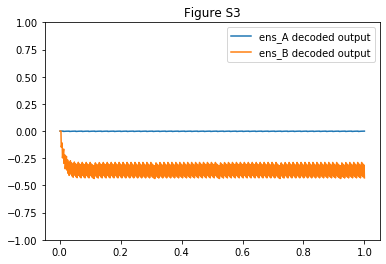

In [2]:

import nengo
import numpy as np
from nengo.solvers import LstsqL2
import nengo_spa as spa
n_neurons = 4
n2_neurons = 3
import matplotlib.pyplot as plt
%matplotlib inline
from nengo.utils.ensemble import response_curves, tuning_curves
file_name = 'Aug26_fig_1_supplement'
synapse = 0.005
import pickle
from nengo.utils.matplotlib import rasterplot

synapse = 0.005
model = nengo.Network(seed = 9)
with model:    
    
    
    ens_A = nengo.Ensemble(n_neurons = n_neurons, dimensions = 1)
    ens_B = nengo.Ensemble(n_neurons = n_neurons, dimensions = 1)
    
    ens_C = nengo.Ensemble(n_neurons = n2_neurons, dimensions = 1)
    ens_D = nengo.Ensemble(n_neurons = n2_neurons, dimensions = 1)
    
    def fx_pt_two(t):
        return 0.2
    def fx_minus_pt_three(t):
        return -0.3
    def times_two(x):
        return 2 * x
    
    input_A = nengo.Node(fx_pt_two)
    input_B = nengo.Node(fx_minus_pt_three)
    
    conn_input_A_ens_A = nengo.Connection(input_A, ens_A,  synapse = synapse)
    conn_input_B_ens_B = nengo.Connection(input_B, ens_B, synapse = synapse)
    
    
    conn_A_C = nengo.Connection(ens_A, ens_C, function = times_two, synapse = synapse)
    conn_B_D = nengo.Connection(ens_B, ens_D, function  = times_two, synapse = synapse)
    
    p_ens_A_spikes = nengo.Probe(ens_A.neurons)
    p_conn_input_ens_A_wts = nengo.Probe(conn_input_A_ens_A, 'weights', synapse = 0.01,sample_every = 0.01)
    p_conn_A_C_wts = nengo.Probe(conn_A_C, 'weights', synapse = 0.01,sample_every = 0.01)
    p_ens_C_spikes = nengo.Probe(ens_C.neurons)
    
    p_input_A = nengo.Probe(input_A, synapse = 0.01) 
    p_ens_A = nengo.Probe(ens_A, synapse = 0.01)
    p_ens_C = nengo.Probe(ens_C, synapse = 0.01)
    
    
    p_ens_B_spikes = nengo.Probe(ens_B.neurons)
    p_conn_input_ens_B_wts = nengo.Probe(conn_input_B_ens_B, 'weights', synapse = 0.01,sample_every = 0.01)
    p_conn_B_D_wts = nengo.Probe(conn_B_D, 'weights', synapse = 0.01,sample_every = 0.01)
    p_ens_D_spikes = nengo.Probe(ens_C.neurons)
    
    p_input_B = nengo.Probe(input_B, synapse = 0.01) 
    p_ens_B = nengo.Probe(ens_B, synapse = 0.01)
    p_ens_D = nengo.Probe(ens_D, synapse = 0.01)

    with nengo.Simulator(model) as sim:
        
        sim.run(1)
       


pickle.dump(sim.data[p_ens_A], open("S3_ens_A_S18", "wb"))
pickle.dump(sim.data[p_ens_B], open("S3_ens_B_S18", "wb"))
plt.figure()
plt.plot(sim.trange(), sim.data[p_ens_A], label = 'Decoded value of ens_A')
plt.plot(sim.trange(), sim.data[p_ens_B], label = 'Decoded value of ens_B')
plt.title("Figure S3")

plt.legend(['ens_A decoded output', 'ens_B decoded output'])
ymin, ymax = -1, 1
plt.ylim(ymin, ymax)
plt.savefig("Figure S3. Decoded output of ensembles" + '.png')

        